## In this Jupyter Notebook I use Gibbs Sampling to draw simulation draws from truncated distributions.

I assume an environment in which individuals $i \in [1, \dots, N]$ take draws from three independent normal variables:
* $\alpha_i \sim N(0,\sigma_\xi)$ 
* $\beta_i \sim N(0,\sigma_\varepsilon)$ 
* $\gamma_i \sim N(0,\sigma_\rho)$ 

With $\xi_i \perp \varepsilon_i \perp \rho_i \quad \forall i$

Though these variable draws are independent, I'm going to also assume that borrowers could be of one of three types: low, medium or high. So each individual $i$ can be mapped into a type $\tau(i) \in \{Low, Medium, High\}$. Types are defined by how the sum of the three variables relates to two particular cutoffs: $\underline{C}, \bar{C}$. Explicity:
* **Low-type** consumer: $\alpha_i + \beta_i + \gamma_i \leq \underline{C}$
* **Medium-type** consumer: $\underline{C} < \alpha_i + \beta_i + \gamma_i \leq \bar{C}$
* **Low-type** consumer: $\bar{C} < \alpha_i + \beta_i + \gamma_i$

This is where Gibbs Sampling comes in: I may want to draw $\alpha_i, \beta_i, \gamma_i$ draws *conditional on type*. If we want to say that an individual is a given type and then want to take simulation draws, we will no longer be able to draw variable independently. The code below allows an interested statistician to take draws of $\alpha_i, \beta_i, \gamma_i$ when conditioning on an individuals type. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import my Gibbs Sampling functions
from Gibbs_function import conditional_samp_trunc, trunc_gibbs_sampler

In [2]:
N_vars = 3
my_means = np.zeros(N_vars)
my_vars = np.array([45, 5, 10])

# Standard uniform sim draws, neccesary for simulation of truncated normals
N_sims = 1_000
my_draws = np.random.uniform(0,1, (N_sims, 3))

# Setup upper and lower bounds for truncation draws
low_bound =  np.array([-5, -85, -300, 15, 25])
high_bound = np.array([0, -50, -200, 30, 100])

In [3]:
cov = np.zeros((N_vars, N_vars))
np.fill_diagonal(cov, np.array([200, 25, 100]))
print("Variance-covariance matrix:")
print(cov)

Variance-covariance matrix:
[[200.   0.   0.]
 [  0.  25.   0.]
 [  0.   0. 100.]]


In [4]:
# Set up an example x matrix

first = np.array([[-30, -2,10],
                  [5, 1, 5],
                  [10, 0,1]])

sec = np.array([[-100, -75,-25],
                  [-4, 5, 5],
                  [4, 3, 15]])

third = np.array([[-300, -100,1],
                  [-5, -10, -50],
                  [-10, -15,0.3]])

fourth = np.array([[1, -5, 15],
                  [1, 20, 17],
                  [1.2, 3, 5]])

fifth = np.array([[-30, -2,10],
                  [5, 1, 5],
                  [10, 0,1]])

large_sample_start_x = np.stack([first, sec, third, fourth, fifth])

In [5]:
sim_draws = trunc_gibbs_sampler(large_sample_start_x,
                    my_means, cov,
                    low_bound, high_bound, my_draws)

# Drop the 'initial' draw 
sim_draws = sim_draws[:,1:,:,:]

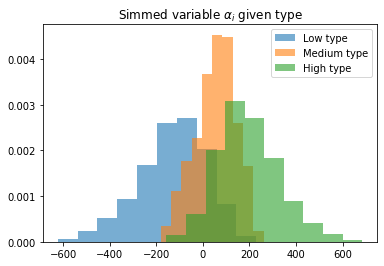

In [12]:
plt.hist(sim_draws[4, :, 0, 0], label='Low type', alpha=0.6, density=True)
plt.hist(sim_draws[4, :, 0, 1], label='Medium type', alpha=0.6, density=True)
plt.hist(sim_draws[4, :, 0, 2], label='High type', alpha=0.6, density=True)

plt.title("Simmed variable " + r'$\alpha_i$' + " given type")
plt.legend()
plt.show()

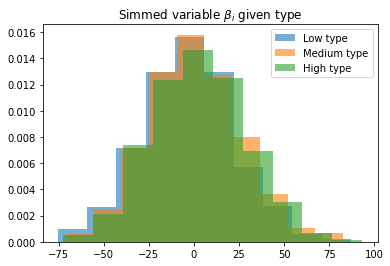

In [13]:
plt.hist(sim_draws[4, :, 1, 0], label='Low type', alpha=0.6, density=True)
plt.hist(sim_draws[4, :, 1, 1], label='Medium type', alpha=0.6, density=True)
plt.hist(sim_draws[4, :, 1, 2], label='High type', alpha=0.6, density=True)

plt.title("Simmed variable " + r'$\beta_i$' + " given type")
plt.legend()
plt.show()

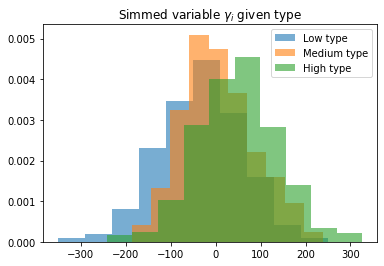

In [14]:
plt.hist(sim_draws[4, :, 2, 0], label='Low type', alpha=0.6, density=True)
plt.hist(sim_draws[4, :, 2, 1], label='Medium type', alpha=0.6, density=True)
plt.hist(sim_draws[4, :, 2, 2], label='High type', alpha=0.6, density=True)

plt.title("Simmed variable " + r'$\gamma_i$' + " given type")
plt.legend()
plt.show()

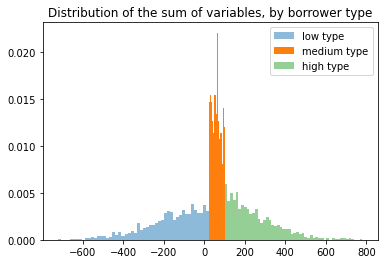

In [9]:
cutoff_ind = 4

plt.hist(sim_draws[cutoff_ind, :, :, 0].sum(axis=1), bins=50, label='low type',alpha=0.5, density=True)
plt.hist(sim_draws[cutoff_ind, :, :, 1].sum(axis=1), bins=50, label='medium type', density=True)
plt.hist(sim_draws[cutoff_ind, :, :, 2].sum(axis=1), bins=50, label='high type', alpha=0.5, density=True)

plt.title("Distribution of the sum of variables, by borrower type")
plt.legend()
plt.show()